<a href="https://colab.research.google.com/github/Frost-Codes/MaskNoMaskTransferredLearning/blob/main/TransferredLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mask No Mask Binary Classification using Mobile Net V2**

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.listdir('./drive/MyDrive/DataScience')

['Kaggel',
 'deepL.ipynb',
 'Images.zip',
 'SignLanguageCN.ipynb',
 'maskNoMask.zip',
 'multiClassCN.ipynb',
 'CatsDogs.ipynb',
 'maskNoMask.ipynb',
 'TransferredLearning.ipynb']

In [ ]:
IMAGE_ZIP = './drive/MyDrive/DataScience/maskNoMask.zip'

In [ ]:
os.path.isfile(IMAGE_ZIP)

True

In [ ]:
os.mkdir('.data')

In [ ]:
os.listdir()

['.config', '.data', 'drive', 'sample_data']

In [ ]:
! cp ./drive/MyDrive/DataScience/maskNoMask.zip ./.data

In [ ]:
os.chdir('./.data')

In [ ]:
os.listdir()

['maskNoMask.zip']

In [ ]:
! unzip maskNoMask.zip

In [ ]:
os.listdir('./Face Mask Dataset')

['Test', 'Train', 'Validation']

In [ ]:
os.chdir('./Face Mask Dataset/')

In [ ]:
os.getcwd()

'/content/.data/Face Mask Dataset'

In [ ]:
os.listdir()

['Test', 'Train', 'Validation']

In [ ]:
TRAIN_DIRECTORY = './Train'
VALIDATION_DIRECTORY = './Validation'
TEST_DIRECTORY = './Test'
CATEGORIES = ['WithMask', 'WithoutMask']
SIZE = 100

In [ ]:
print(f"Train: WithMask: {len(os.listdir(os.path.join(TRAIN_DIRECTORY, 'WithMask')))}")
print(f"Train: WithoutMask: {len(os.listdir(os.path.join(TRAIN_DIRECTORY, 'WithoutMask')))}")

print(f"Validation: WithMask: {len(os.listdir(os.path.join(VALIDATION_DIRECTORY, 'WithMask')))}")
print(f"Validation: WithoutMask: {len(os.listdir(os.path.join(VALIDATION_DIRECTORY, 'WithoutMask')))}")

print(f"Test: WithMask: {len(os.listdir(os.path.join(TEST_DIRECTORY, 'WithMask')))}")
print(f"Test: WithoutMask: {len(os.listdir(os.path.join(TEST_DIRECTORY, 'WithoutMask')))}")

Train: WithMask: 5000
Train: WithoutMask: 5000
Validation: WithMask: 400
Validation: WithoutMask: 400
Test: WithMask: 483
Test: WithoutMask: 509


In [ ]:
! pip install keras_preprocessing

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(horizontal_flip=True, shear_range=0.2, zoom_range=0.2, rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_data_gen.flow_from_directory(TRAIN_DIRECTORY, target_size=(224, 224), batch_size=32, shuffle=True, seed=42,
                                                class_mode='categorical', classes=CATEGORIES)

validation_data = validation_data_gen.flow_from_directory(VALIDATION_DIRECTORY, target_size=(224, 224), batch_size=32, shuffle=True, seed=42,
                                      class_mode='categorical', classes=CATEGORIES)

test_data = test_data_gen.flow_from_directory(TEST_DIRECTORY, target_size=(224, 224), batch_size=32, shuffle=True, seed=42,
                                              class_mode='categorical', classes=CATEGORIES)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


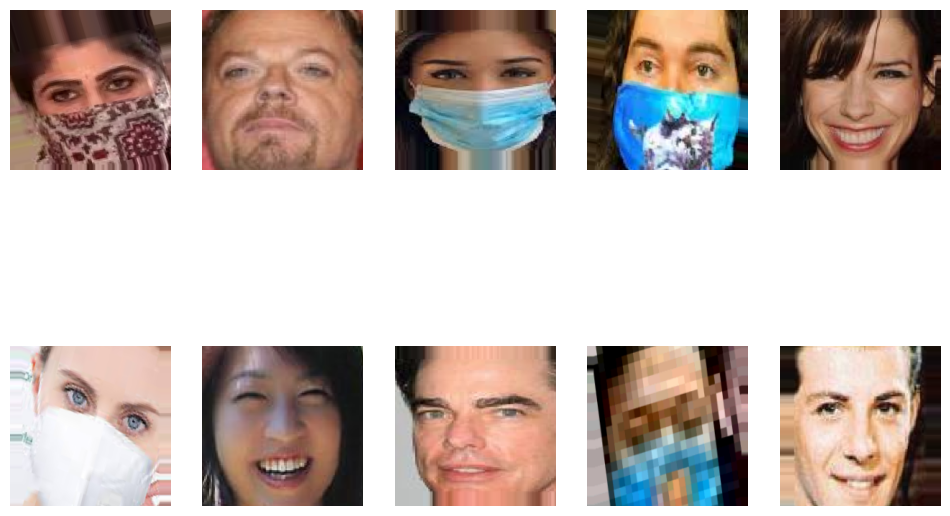

In [ ]:
rows = 2
columns = 5
label = []
figure = plt.figure(figsize=(12, 8))
sampleImage  = 1
for index in range(1, 11):
  figure.add_subplot(rows, columns, index)
  batch = next(train_data)
  images = batch[0]
  labels = batch[1]
  images = np.squeeze(images)
  plt.imshow(images[index-1])
  sampleImage = images[index-1]
  label.append(labels[index-1])
  plt.axis('off')

In [ ]:
sampleImage.shape

(224, 224, 3)

In [ ]:
sampleImage[0][0]

array([0.05490196, 0.0509804 , 0.03137255], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
mobilenet = MobileNetV2(input_shape=sampleImage.shape, weights='imagenet', include_top=False)

model = Sequential()
model.add(mobilenet)

model.add(Dense(128, activation='relu'))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))

model.layers[0].trainable = False
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 dense_5 (Dense)             (None, 7, 7, 128)         163968    
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 12546     
                                                                 
Total params: 2434498 (9.29 MB)
Trainable params: 176514 (689.51 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
313/313 [==============================] - 558s 2s/step - loss: 0.0526 - accuracy: 0.9816 - val_loss: 0.0115 - val_accuracy: 0.9962
Epoch 2/5
313/313 [==============================] - 552s 2s/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0072 - val_accuracy: 0.9975
Epoch 3/5
313/313 [==============================] - 546s 2s/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0098 - val_accuracy: 0.9950
Epoch 4/5
313/313 [==============================] - 550s 2s/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.0941 - val_accuracy: 0.9800
Epoch 5/5
313/313 [==============================] - 548s 2s/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0091 - val_accuracy: 0.9962
CPU times: user 53min 46s, sys: 17min 53s, total: 1h 11min 39s
Wall time: 46min 29s


In [ ]:
model_history = history.history
model_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

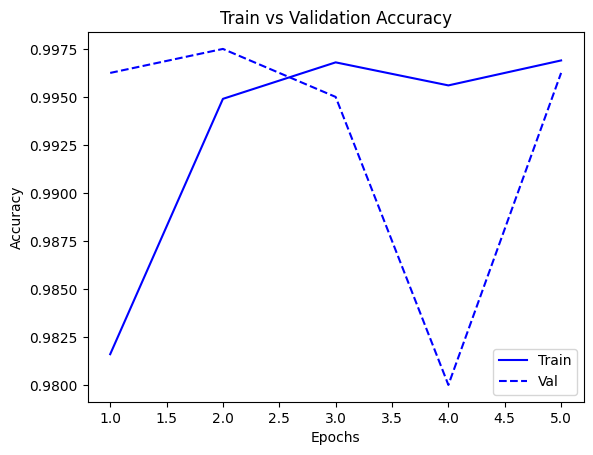

In [ ]:
train_acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
epochs = range(1, len(train_acc)+1)

plt.plot(epochs, train_acc, 'b', label = 'Train')
plt.plot(epochs, val_acc, 'b--', label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

31/31 [==============================] - 40s 1s/step - loss: 0.0423 - accuracy: 0.9919


[0.04233190417289734, 0.9919354915618896]

In [ ]:
from google.colab import files

In [ ]:
os.getcwd()

'/content/.data/Face Mask Dataset'

In [ ]:
os.chdir('../')

In [ ]:
os.getcwd()

'/content'

In [ ]:
model_name = 'MaskNoMaskModel.h5'
model.save(filepath=f"./drive/MyDrive/DataScience/{model_name}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
os.listdir('./drive/MyDrive/DataScience')

['Kaggel',
 'deepL.ipynb',
 'Images.zip',
 'SignLanguageCN.ipynb',
 'maskNoMask.zip',
 'multiClassCN.ipynb',
 'CatsDogs.ipynb',
 'maskNoMask.ipynb',
 'TransferredLearning.ipynb',
 'MaskNoMaskModel.h5']

In [ ]:
# Function to compute statistics for an image
def compute_stats(image_path):
    img = cv2.imread(image_path)

    if img is not None:
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for entropy calculation

      # Calculate statistics
      mean_val = np.mean(img)
      std_val = np.std(img)

      histogram = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
      histogram = histogram.ravel() / histogram.sum()  # Normalize histogram values
      entropy = -np.sum(histogram * np.log2(histogram + 1e-10))  # Compute entropy

      return mean_val, std_val, entropy
    print("Faulty Image encountered")

In [ ]:
compute_stats('./Train/WithoutMask/4129.png')

(91.60332858668565, 61.105119917655664, 7.433488)

In [ ]:
mean, std, entropy = [], [], []
for filename in os.listdir(f"{TRAIN_DIRECTORY}/WithoutMask"):
  image_path = os.path.join(f"{TRAIN_DIRECTORY}/WithoutMask", filename)
  values = compute_stats(image_path)
  if values:
    mean.append(values[0])
    std.append(values[1])
    entropy.append(values[2])

thresholdMean = np.mean(mean)
thresholdStd = np.mean(std)
thresholdEntropy = np.mean(entropy)

print('Mean:', thresholdMean)
print('std:', thresholdStd)
print('Entropy:', thresholdEntropy)

Mean: 121.49482424448556
std: 60.72411555368849
Entropy: 7.3365607


In [ ]:
noisy_images = []
for filename in os.listdir(f"{TRAIN_DIRECTORY}/WithoutMask"):
  image_path = os.path.join(f"{TRAIN_DIRECTORY}/WithoutMask", filename)
  mean, std, entropy = compute_stats(image_path)
  if std > thresholdStd or entropy > thresholdEntropy:
    noisy_images.append(image_path)
len(noisy_images)

3372

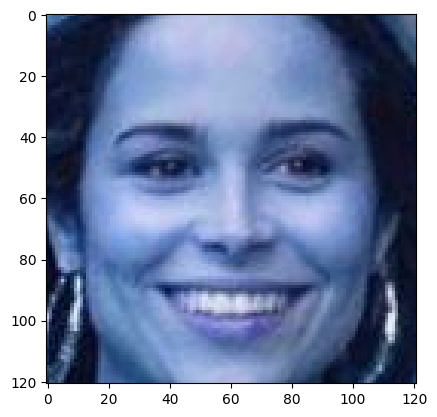

In [ ]:
i = cv2.imread(noisy_images[145])
plt.imshow(i)